In [1]:
%%capture
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv(os.path.join('..', 'data', 'sign_mnist_train', 'sign_mnist_train.csv'))
test_data = pd.read_csv(os.path.join('..', 'data', 'sign_mnist_test', 'sign_mnist_test.csv'))

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
import matplotlib.pyplot as plt
import numpy as np

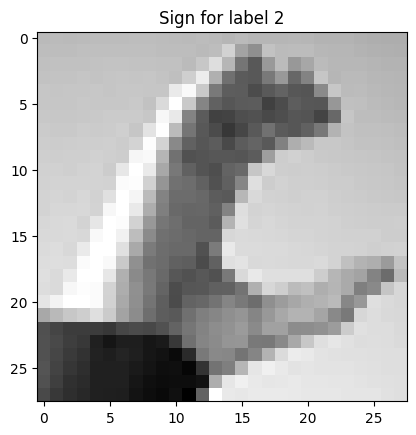

In [5]:
row = train_data.iloc[np.random.randint(0, len(train_data))]

image_size = int(np.sqrt(len(row)))
image = row[1:].values.reshape((image_size, image_size))
label = row[0]

plt.title(label=f"Sign for label {label}")
plt.imshow(image, cmap='gray')
plt.show()

In [3]:
alphabet_map = {index: alphabet for index, alphabet in enumerate('abcdefghijklmnopqrsttuvwxyz')}
class_names = [alphabet_map[i] for i in sorted(train_data.label.unique())]

'j' in class_names and 'z' in class_names

False

In [5]:
# Save dict
import json

with open(os.path.join('..', 'data', 'labels.json'), 'w') as f:
    json.dump(alphabet_map, f, indent=4)

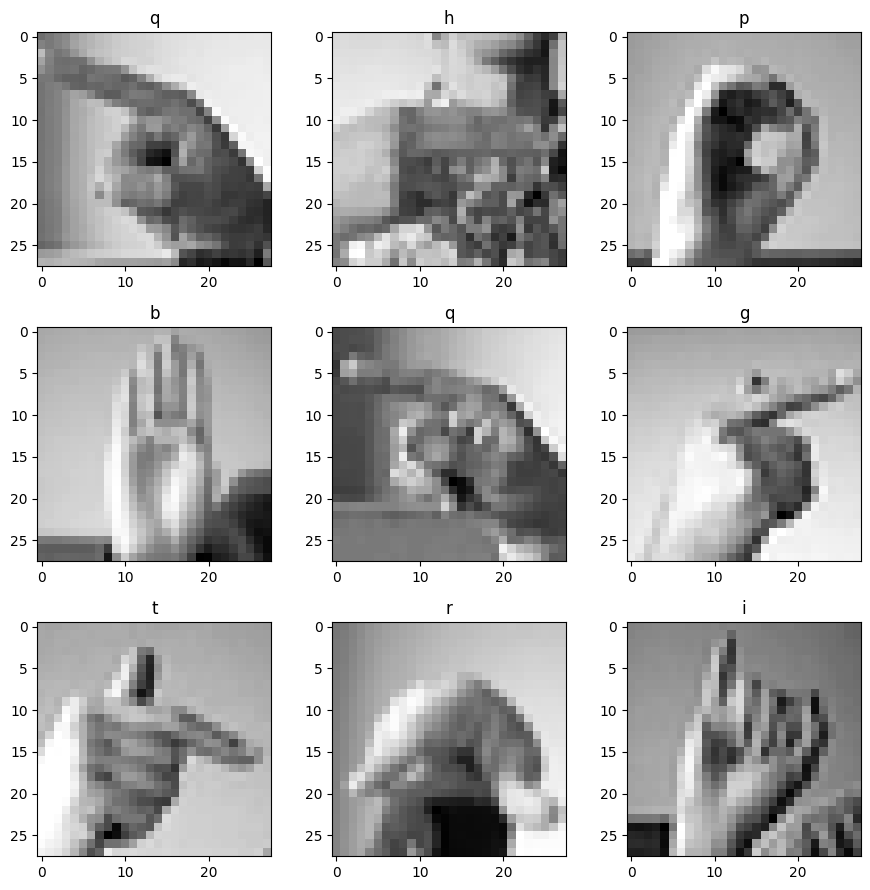

In [7]:
np.random.seed(42)

figure = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    row = train_data.iloc[np.random.randint(0, len(train_data))]
    image_size = int(np.sqrt(len(row) - 1)) # -1 to exclude the label column
    image = row[1:].values.reshape((image_size, image_size))
    label = row[0]

    ax = figure.add_subplot(rows, cols, i)
    ax.set_title(class_names[label])
    ax.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

In [8]:
def skip_j(label):
    if label >= 9:
        label -= 1
    return label

train_data['label'] = train_data['label'].apply(skip_j)
test_data['label'] = test_data['label'].apply(skip_j)

In [9]:
### Change scale from 0-255 to 0-1
train_data.iloc[:, 1:] /= 255
test_data.iloc[:, 1:] /= 255

In [10]:
import torch

## Transforming train data
images_tensor = torch.tensor(train_data.iloc[:, 1:].to_numpy(), dtype=torch.float32)
labels_tensor = torch.tensor(train_data.iloc[:, 0].to_numpy(), dtype=torch.long)

images_tensor = [images_tensor[i].reshape(1, 28, 28) for i in range(len(images_tensor))]

train_data_transformed = [(images_tensor[i], labels_tensor[i]) for i in range(len(train_data))]

## Transforming test data
images_tensor = torch.tensor(test_data.iloc[:, 1:].to_numpy(), dtype=torch.float32)
labels_tensor = torch.tensor(test_data.iloc[:, 0].to_numpy(), dtype=torch.long)

images_tensor = [images_tensor[i].reshape(1, 28, 28) for i in range(len(images_tensor))]

test_data_transformed = [(images_tensor[i], labels_tensor[i]) for i in range(len(test_data))]

In [11]:
# Example
image, label = train_data_transformed[0]
image, label

(tensor([[[0.4196, 0.4627, 0.4980, 0.5255, 0.5451, 0.5608, 0.5725, 0.5882,
           0.6000, 0.6118, 0.6196, 0.6275, 0.6392, 0.6471, 0.6235, 0.6510,
           0.6588, 0.6667, 0.6667, 0.6706, 0.6706, 0.6706, 0.6745, 0.6706,
           0.6706, 0.6667, 0.6667, 0.6627],
          [0.4353, 0.4745, 0.5059, 0.5294, 0.5529, 0.5647, 0.5804, 0.5922,
           0.6039, 0.6157, 0.6275, 0.6392, 0.6431, 0.6667, 0.4667, 0.5961,
           0.6706, 0.6706, 0.6667, 0.6706, 0.6745, 0.6745, 0.6745, 0.6745,
           0.6745, 0.6706, 0.6706, 0.6667],
          [0.4431, 0.4824, 0.5137, 0.5373, 0.5569, 0.5686, 0.5882, 0.5961,
           0.6078, 0.6196, 0.6314, 0.6392, 0.6431, 0.6745, 0.4118, 0.5569,
           0.6667, 0.6706, 0.6706, 0.6706, 0.6745, 0.6745, 0.6784, 0.6784,
           0.6745, 0.6706, 0.6706, 0.6706],
          [0.4549, 0.4902, 0.5216, 0.5451, 0.5608, 0.5725, 0.5922, 0.6000,
           0.6118, 0.6235, 0.6353, 0.6392, 0.6549, 0.6549, 0.3725, 0.5647,
           0.6706, 0.6745, 0.6745, 0.6745, 

In [12]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(
    train_data_transformed, 
    batch_size=batch_size,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data_transformed,
    batch_size=batch_size,
    shuffle=False
)

print(f"Length of train_dataloader: {len(train_dataloader)}, with {batch_size} batch size.")
print(f"Length of train_dataloader: {len(test_dataloader)}, with {batch_size} batch size.")

Length of train_dataloader: 858, with 32 batch size.
Length of train_dataloader: 225, with 32 batch size.


In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [15]:
from torch import nn

class SignLanguageClassifierV0(nn.Module):
    def __init__(self, num_classes=24):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=12, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(in_features=384, out_features=120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, num_classes),
            nn.ReLU()
        )
        
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

model = SignLanguageClassifierV0(num_classes=len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.009, momentum=0.9)

In [16]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    patience=3,
    factor=0.5,
    verbose=True
)

In [17]:
best_test_loss = float('inf')
early_stopping_patience = 5
patience_counter = 0
num_epochs = 32

for epoch in range(num_epochs):
    train_loss = 0.0

    for i, (inputs, labels) in enumerate(train_dataloader):

        # Reset gradient
        optimizer.zero_grad()

        output = model(inputs)

        loss = loss_fn(output, labels)
        
        # Gradient computation
        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)

    ### Testing
    model.eval()
    test_loss = 0.0

    with torch.inference_mode():
        for data, target in test_dataloader:
            outputs = model(data)
            loss = loss_fn(outputs, target)
            test_loss += loss.item()
    
    test_loss /= len(test_dataloader)

    scheduler.step(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}')

    # Implement early stopping
    if test_loss < best_test_loss:
        best_val_loss = test_loss
        patience_counter = 0 # Reset counter if we see improvement
    else:
        patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

Epoch 1/32, Training Loss: 2.7742, Validation Loss: 1.5854
Epoch 2/32, Training Loss: 0.4895, Validation Loss: 0.4631
Epoch 3/32, Training Loss: 0.0345, Validation Loss: 0.4251
Epoch 4/32, Training Loss: 0.0007, Validation Loss: 0.4668
Epoch 5/32, Training Loss: 0.0004, Validation Loss: 0.4912
Epoch 6/32, Training Loss: 0.0003, Validation Loss: 0.5033
Epoch 7/32, Training Loss: 0.0002, Validation Loss: 0.5198
Epoch 8/32, Training Loss: 0.0002, Validation Loss: 0.5237
Epoch 9/32, Training Loss: 0.0001, Validation Loss: 0.5251
Epoch 10/32, Training Loss: 0.0001, Validation Loss: 0.5334
Epoch 11/32, Training Loss: 0.0001, Validation Loss: 0.5337
Epoch 12/32, Training Loss: 0.0001, Validation Loss: 0.5373
Epoch 13/32, Training Loss: 0.0001, Validation Loss: 0.5395
Epoch 14/32, Training Loss: 0.0001, Validation Loss: 0.5409
Epoch 15/32, Training Loss: 0.0001, Validation Loss: 0.5430
Epoch 16/32, Training Loss: 0.0001, Validation Loss: 0.5438
Epoch 17/32, Training Loss: 0.0001, Validation Lo

In [18]:
torch.save(model, os.path.join('..', 'models', 'full_model.pth'))
torch.save(model.state_dict(), os.path.join('..', 'models', 'model_weights.pth'))

In [27]:
all_preds = []
all_labels = []

with torch.inference_mode(): 
    for data, labels in test_dataloader:
        inputs = data
        true_labels = labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted)
        all_labels.extend(true_labels)

all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

accuracy = calculate_accuracy(all_labels, all_preds) * 100
print(f'Accuracy: {accuracy:.4f}%')

Accuracy: 90.3095%


In [20]:
import sys

if '..\\src' not in sys.path:
    sys.path.append(os.path.join('..', 'src'))

from helper import eval_model

In [21]:
# if '..\\src' in sys.path:
#     sys.path.pop()

# sys.path

In [22]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [23]:
eval_model(model=model, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

{'model_name': 'SignLanguageClassifierV0',
 'model_loss': 0.5498449206352234,
 'model_acc': 90.25}

In [24]:
loss, acc = 0, 0
model.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        # Make predictions with the model
        y_pred = model(X)
        
        # Accumulate the loss and accuracy values per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y, 
                            y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
    
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(test_dataloader)
    acc /= len(test_dataloader)

In [25]:
y_pred.argmax(dim=1)

tensor([17,  2,  4,  2])

In [26]:
y

tensor([11,  2,  4,  2])